In [83]:
from sklearn import datasets
import pydotplus
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
# Load the wine dataset
wtestdata = pd.read_csv('wine_test_data.csv')
wtestlabels = pd.read_csv('wine_test_labels.csv')
wtraindata = pd.read_csv('wine_train_data.csv')
wtrainlabels = pd.read_csv('wine_train_labels.csv')
wvaldata = pd.read_csv('wine_val_data.csv')
wvallabels = pd.read_csv('wine_val_labels.csv')

In [19]:
#Concat train data and validation data
X_trainframes = [wtraindata, wvaldata]
Y_trainframes = [wtrainlabels,wvallabels]
X_train = pd.concat(X_trainframes)
Y_train = pd.concat(Y_trainframes)

In [14]:
#Normalize data
X_train_norm=(X_train-X_train.mean())/X_train.std()
wtraindata_norm=(wtraindata-X_train.mean())/X_train.std()
wvaldata_norm=(wvaldata-X_train.mean())/X_train.std()
wtestdata_norm=(wtestdata-X_train.mean())/X_train.std()
#print(X_train_norm.mean(), X_train_norm.std())
#print(wtraindata_norm.mean(), wtraindata_norm.std())
#print(wvaldata_norm.mean(), wvaldata_norm.std())
#print(wtestdata_norm.mean(), wtestdata_norm.std())

Question 7: Train k-nn model on train + validation data and report accuracy
on test data. Use Euclidean distance and k=3. (1 mark)

In [48]:
clf = KNeighborsClassifier(3, p=2) # p = 1 corresponds to Manhattan distance
# p = 2 gives Euclidean distance (default is p = 2 and hence, Euclidean distance)
clf.fit(X_train_norm, Y_train.values.ravel())
predictions = clf.predict(wtestdata_norm)
wtestlab = list(wtestlabels['class'])
accuracy = np.sum(predictions == wtestlab)/(len(predictions))
print ("Accuracy = " + str(accuracy) + " at k = 3")

Accuracy = 0.871794871795 at k = 3


Question 8: Train the model on train data for distance metrics dened by `1,
`inf , `2. Report the accuracies on the validation data. Select the best metric
and report the accuracy on the test data for the selected metric. Use k=3. (1
mark)

In [65]:
for i in ('manhattan','chebyshev','euclidean'):
    clf = KNeighborsClassifier(3, metric=i)
    clf.fit(wtraindata_norm, wtrainlabels.values.ravel())
    predictions = clf.predict(wvaldata_norm)
    wvallab = list(wvallabels['class'])
    accuracy = np.sum(predictions == wvallab)/(len(predictions))
    print ("Accuracy = " + str(accuracy) + " using distance metric %s" %i)

Accuracy = 0.948717948718 using distance metric manhattan
Accuracy = 0.923076923077 using distance metric chebyshev
Accuracy = 0.923076923077 using distance metric euclidean


Results showed us that the manhattan distance is te best metric for our validation data

In [52]:
#test data predition
clf = KNeighborsClassifier(3, metric='manhattan')
clf.fit(wtraindata_norm, wtrainlabels.values.ravel())
predictions = clf.predict(wtestdata_norm)
wtestlab = list(wtestlabels['class'])
accuracy = np.sum(predictions == wtestlab)/(len(predictions))
print ("Accuracy = " + str(accuracy) + " at k = 3")

Accuracy = 0.948717948718 at k = 3


Question 9: Train the k-nn model on train data for k=1,3,5,7,9. Report and
plot the accuracies on the validation data. Select the best 'k' value and report
the accuracy on the test data for the selected 'k'. Use Euclidean distance. (2
marks)

In [84]:
accu=pd.DataFrame(columns=['kvalue','accuracy'])
for i in (1,3,5,7,9):
    clf = KNeighborsClassifier(i, p=2)
    clf.fit(wtraindata_norm, wtrainlabels.values.ravel())
    predictions = clf.predict(wvaldata_norm)
    wvallab = list(wvallabels['class'])
    accuracy = np.sum(predictions == wvallab)/(len(predictions))
    data = pd.DataFrame({'kvalue': [i],'accuracy':[accuracy]})
    accu=accu.append(data)
    print ("Accuracy = " + str(accuracy) + " at k = %s" % i)

Accuracy = 0.948717948718 at k = 1
Accuracy = 0.923076923077 at k = 3
Accuracy = 0.948717948718 at k = 5
Accuracy = 0.974358974359 at k = 7
Accuracy = 0.948717948718 at k = 9


Results showed us when we use k = 7, we got the highest accuracy for our validation data

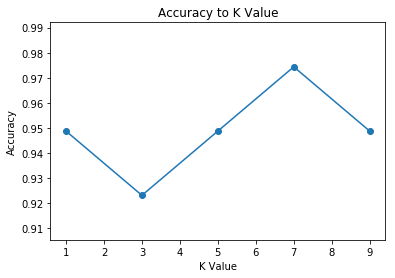

In [90]:
#plot accuracy with k value
plt.scatter(accu['kvalue'], accu['accuracy'])
plt.plot(accu['kvalue'], accu['accuracy'])
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title("Accuracy to K Value")
plt.show()

In [55]:
clf = KNeighborsClassifier(7, p=2)
clf.fit(wtraindata_norm, wtrainlabels.values.ravel())
predictions = clf.predict(wtestdata_norm)
wtestlab = list(wtestlabels['class'])
accuracy = np.sum(predictions == wtestlab)/(len(predictions))
print ("Accuracy = " + str(accuracy) + " at k=7")

Accuracy = 0.948717948718 at k=7


Question 10: Instead of using full train data, train the model using the rst
20, 40, 60, 80 and 100 data samples from train data. Keep the validation set
unchanged during this analysis. Report and plot the accuracies on the validation
data. Use Euclidean distance and k=3. Note: Don't shue the data and use
only the 'rst n samples', otherwise your answers may dier. (2 marks)

In [97]:
accu=pd.DataFrame(columns=['Sample','accuracy'])
for i in (20,40,60,80,100):
    data = wtraindata_norm.head(i)
    labels = wtrainlabels.head(i)
    clf = KNeighborsClassifier(3, p=2)
    clf.fit(data, labels.values.ravel())
    predictions = clf.predict(wvaldata_norm)
    wvallab = list(wvallabels['class'])
    accuracy = np.sum(predictions == wvallab)/(len(predictions))
    data = pd.DataFrame({'Sample': [i],'accuracy':[accuracy]})
    accu=accu.append(data)
    print ('when our samples are %s:' % i)
    print ('We get validation accuracy = ' + str(accuracy)) 

when our samples are 20:
We get validation accuracy = 0.948717948718
when our samples are 40:
We get validation accuracy = 1.0
when our samples are 60:
We get validation accuracy = 1.0
when our samples are 80:
We get validation accuracy = 1.0
when our samples are 100:
We get validation accuracy = 0.923076923077


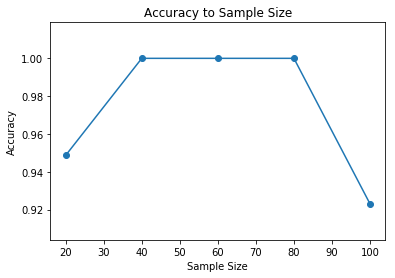

In [95]:
#plot accuracy with sample size
plt.scatter(accu['Sample'], accu['accuracy'])
plt.plot(accu['Sample'], accu['accuracy'])
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.title("Accuracy to Sample Size")
plt.show()